# Setup the Env

In [1]:
import sys
import os

import sagemaker
from sagemaker import get_execution_role

# Add the parent directory to the sys.path
sys.path.insert(0, os.path.abspath('..'))

# Define IAM role
role = get_execution_role()
role

# Establish S3 bucket connection
import boto3
s3 = boto3.client('s3')
bucket = 'capstone-bucket-4-friends'

# Take a look at current dir
print(os.getcwd())

from file_utilities import s3_download 

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
/home/sagemaker-user/capstone-2024-summer/src/rachel


# Import libraries

In [2]:
# standard libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
!pip install seaborn -q
import seaborn as sns

# Download Data from S3 as needed

In [3]:
#crsp = "CRSP/crsp_2018-2023.csv"
#crsp_path = s3_download(crsp)

In [4]:
#index = "Index/security_master.csv"
#index_path = s3_download(index)

# Load the dataset

https://www.crsp.org/wp-content/uploads/guides/CRSP_US_Stock_&_Indexes_Database_Data_Descriptions_Guide.pdf

In [5]:
crsp_df = pd.read_csv("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023.csv", parse_dates=["date"])

crsp_df.head()

/tmp/ipykernel_2238/2378022533.py:1: DtypeWarning: Columns (2,5,6,9,18,19,20,22,24,49,57) have mixed types. Specify dtype option on import or set low_memory=False.
  crsp_df = pd.read_csv("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023.csv", parse_dates=["date"])


,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACPR,CFACSHR,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10026,2018-01-02,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,152.39000,1036.0,-0.017454,0.008505,0.008471,0.011232,0.011214,0.008303
1,10026,2018-01-03,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,149.07001,1283.0,-0.009988,0.005856,0.005852,0.005103,0.005094,0.006399
2,10026,2018-01-04,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,147.77000,1138.0,0.013813,0.004001,0.003858,0.005272,0.005217,0.004029
3,10026,2018-01-05,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,149.74001,745.0,-0.009550,0.005804,0.005802,0.003880,0.003865,0.007034
4,10026,2018-01-08,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,147.77000,990.0,0.000742,0.001816,0.001802,0.000584,0.000574,0.001662


# Take a look at the columns

In [6]:
crsp_df.columns

Index(['PERMNO', 'date', 'NAMEENDT', 'SHRCD', 'EXCHCD', 'SICCD', 'NCUSIP',
       'TICKER', 'COMNAM', 'SHRCLS', 'TSYMBOL', 'NAICS', 'PRIMEXCH', 'TRDSTAT',
       'SECSTAT', 'PERMCO', 'ISSUNO', 'HEXCD', 'HSICCD', 'CUSIP', 'DCLRDT',
       'DLAMT', 'DLPDT', 'DLSTCD', 'NEXTDT', 'PAYDT', 'RCRDDT', 'SHRFLG',
       'HSICMG', 'HSICIG', 'DISTCD', 'DIVAMT', 'FACPR', 'FACSHR', 'ACPERM',
       'ACCOMP', 'SHRENDDT', 'NWPERM', 'DLRETX', 'DLPRC', 'DLRET', 'TRTSCD',
       'NMSIND', 'MMCNT', 'NSDINX', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET',
       'BID', 'ASK', 'SHROUT', 'CFACPR', 'CFACSHR', 'OPENPRC', 'NUMTRD',
       'RETX', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'sprtrn'],
      dtype='object')

In [7]:
crsp_df.dtypes

PERMNO               int64
date        datetime64[ns]
NAMEENDT            object
SHRCD              float64
EXCHCD             float64
                 ...      
vwretd             float64
vwretx             float64
ewretd             float64
ewretx             float64
sprtrn             float64
Length: 63, dtype: object

In [8]:
og_crsp_len = len(crsp_df)
og_crsp_cols = len(crsp_df.columns)
print("number of records:", og_crsp_len)
print("number of columns:", og_crsp_cols)

number of records: 12665502
number of columns: 63


# Null analysis

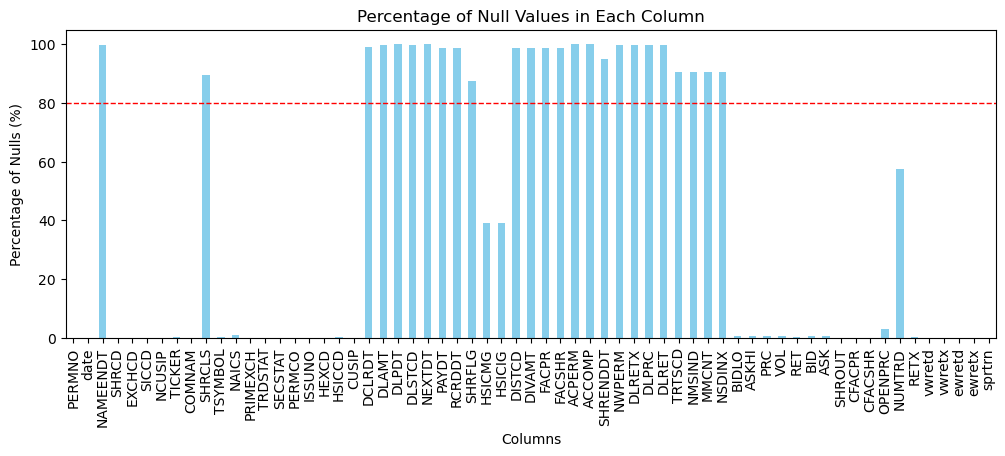

In [9]:
# Count the number of nulls in each column
null_counts = crsp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_df)
null_percentages = (null_counts / total_rows) * 100

# Plot the percentages as a bar plot
null_percentages.plot(kind='bar', figsize=(12, 4), color='skyblue')
plt.axhline(y=80, color='red', linestyle='--', linewidth=1)
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Nulls (%)')
plt.show()

## A1. Drop all columns which contains more than 80% null as they cannot be reasonably obtained or imputed.

In [10]:
og_cols = len(crsp_df.columns)
columns_to_drop = null_percentages[null_percentages > 80].index
crsp_df = crsp_df.drop(columns=columns_to_drop)
new_cols = len(crsp_df.columns)
print("num_columns_removed: ", og_cols - new_cols)
print("num_columns_kept:", new_cols)

num_columns_removed:  25
num_columns_kept: 38


## A2. Drop all columns containing duplicate information

In [11]:
og_cols = len(crsp_df.columns)
columns_to_drop = ["PERMCO", "ISSUNO", "TSYMBOL", "RETX", "vwretx", "ewretx", "HEXCD", "SICCD", "HSICCD", "HSICIG", "HSICMG"]
crsp_df = crsp_df.drop(columns=columns_to_drop)
new_cols = len(crsp_df.columns)
print("num_columns_removed: ", og_cols - new_cols)
print("num_columns_kept:", new_cols)

num_columns_removed:  11
num_columns_kept: 27


# Take another look at the null analysis

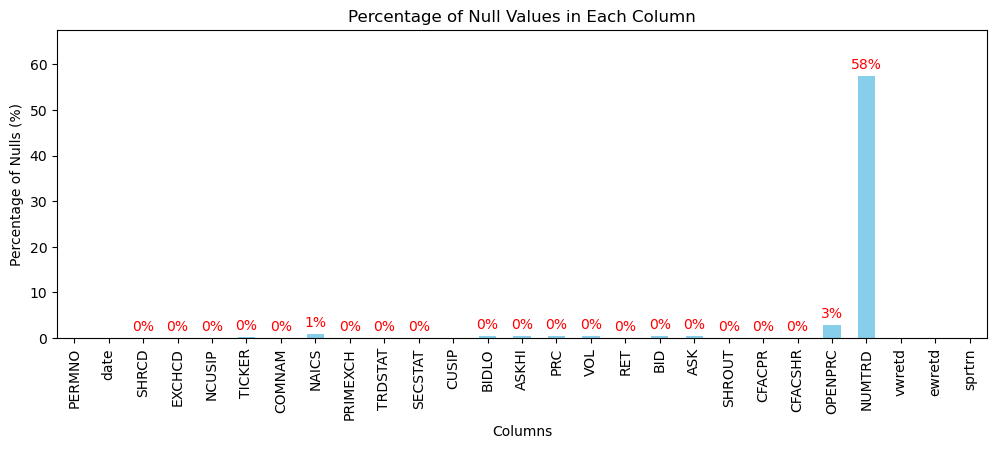

In [12]:
# Count the number of nulls in each column
null_counts = crsp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_df)
null_percentages = (null_counts / total_rows) * 100

# Plot the percentages as a bar plot
ax = null_percentages.plot(kind='bar', figsize=(12, 4), color='skyblue')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylim(0, max(null_percentages.values)+10)
plt.ylabel('Percentage of Nulls (%)')

# Annotate the bars with the percentage values
for i, percentage in enumerate(null_percentages):
    if percentage != 0:
        ax.annotate(f'{percentage:.0f}%', xy=(i, percentage), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom', color='red')

plt.show()

# Review unique values and distribution in each remaining column

In [13]:
for column in crsp_df.columns:
  print("-"*10, column, "-"*10)
  print(crsp_df[column].nunique())
  print(crsp_df[column].value_counts())

---------- PERMNO ----------
12765
PERMNO
21259    1531
90731    1527
16780    1526
16437    1523
10065    1522
         ... 
15403       1
43095       1
92771       1
91431       1
13713       1
Name: count, Length: 12765, dtype: int64
---------- date ----------
1509
date
2022-10-13    9598
2022-09-30    9597
2022-10-17    9597
2022-10-06    9597
2022-09-29    9596
              ... 
2018-01-08    7339
2018-01-03    7339
2018-01-10    7338
2018-01-05    7338
2018-01-09    7337
Name: count, Length: 1509, dtype: int64
---------- SHRCD ----------
16
SHRCD
11.0    5944259
73.0    3673436
12.0    1141877
31.0     603387
44.0     424804
14.0     360856
18.0     272236
71.0     127196
48.0      53307
74.0      31661
72.0      20673
75.0       6027
41.0       3018
15.0       1519
21.0        764
10.0          2
Name: count, dtype: int64
---------- EXCHCD ----------
10
EXCHCD
 3.0     5382632
 1.0     3762010
 4.0     2424033
 5.0      652650
 2.0      400154
 0.0       39599
-1.0        3580


# Review SHRCD: security type
SHRCD is a two-digit code describing the type of shares traded. The first digit describes the type of security traded.

## B1. Fill SHRCD na with 00 as undefined

In [14]:
crsp_df["SHRCD"] = crsp_df["SHRCD"].fillna("00")

## B2. Split SHRCD to two columns [SHRCD_Type, SHRCD_Detail]

In [15]:
crsp_df[['SHRCD_Type', 'SHRCD_Detail']] = crsp_df['SHRCD'].astype(str).str.split('', expand=True).iloc[:, 1:3]

In [16]:
for column in ['SHRCD_Type', 'SHRCD_Detail']:
  print("-"*10, column, "-"*10)
  print(crsp_df[column].nunique())
  print(crsp_df[column].value_counts())

---------- SHRCD_Type ----------
6
SHRCD_Type
1    7720749
7    3858993
3     603387
4     481129
2        764
0        480
Name: count, dtype: int64
---------- SHRCD_Detail ----------
7
SHRCD_Detail
1    6678624
3    3673436
2    1162550
4     817321
8     325543
5       7546
0        482
Name: count, dtype: int64


## B3. Keep only records where SHRCD_type == 1 (Ordinary Common Shares)

In [17]:
og_len = len(crsp_df)
crsp_df = crsp_df[crsp_df["SHRCD_Type"] == "1"]
new_len = len(crsp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  4944753
num_records_kept:  7720749


# Review EXCHCD: Listed Exchange
EXCHCD is a code indicating the exchange on which a security is listed.

## C1. Fill EXCHCD na with 0 as "not listed in any exchange"

In [18]:
crsp_df["EXCHCD"] = pd.to_numeric(crsp_df['EXCHCD'], errors='coerce').fillna(0).astype(int)

## C2. Remove all records where EXCHCD < 0 (Halted, Suspended, or Not Trading)

In [19]:
og_len = len(crsp_df)
crsp_df = crsp_df[crsp_df["EXCHCD"] > 0]
new_len = len(crsp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

crsp_df["EXCHCD"] = crsp_df["EXCHCD"].astype(str)

num_records_removed:  41551
num_records_kept:  7679198


# Review PRIMEXCH: Primary Exchange
Primary Exchange is a one-character code which identifies the primary exchange on which the security trades.

https://www.crsp.org/wp-content/uploads/appendix/FlagType_EC.html

## D1. Fill PRIMEXCH na with X as "Unknown"

In [20]:
crsp_df["PRIMEXCH"] = crsp_df["PRIMEXCH"].fillna("X")

# Review TRDSTAT: Trading Status
Trading Status is a one-character field containing the trading status of securities.

## E1. Fill TRDSTAT na with X as "Unknown"

In [21]:
crsp_df["TRDSTAT"] = crsp_df["TRDSTAT"].fillna("X")

## E2. Keep only records where TRDSTAT == A (Active trading status)

In [22]:
og_len = len(crsp_df)
crsp_df = crsp_df[crsp_df["TRDSTAT"] == "A"]
new_len = len(crsp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  7679198


# Review SECSTAT: Security Status
Security Status is a one-character code that describes the status of a security.

## E1. Fill SECSTAT na with X as "Unknown"

In [23]:
crsp_df["SECSTAT"] = crsp_df["SECSTAT"].fillna("X")

## E2. Keep only records where SECSTAT == R (Regular Way)

In [24]:
og_len = len(crsp_df)
crsp_df = crsp_df[crsp_df["SECSTAT"] == "R"]
new_len = len(crsp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  0
num_records_kept:  7679198


# Take another look at the null analysis

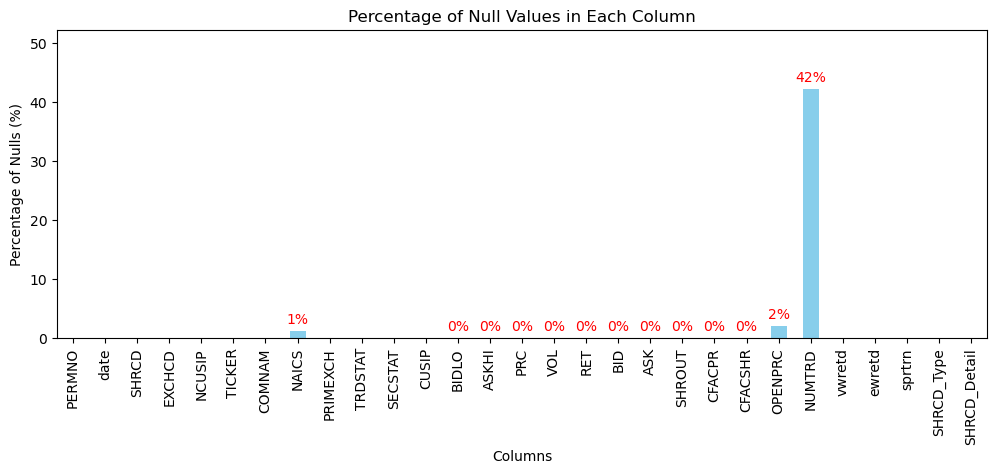

In [25]:
# Count the number of nulls in each column
null_counts = crsp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_df)
null_percentages = (null_counts / total_rows) * 100

# Plot the percentages as a bar plot
ax = null_percentages.plot(kind='bar', figsize=(12, 4), color='skyblue')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylim(0, max(null_percentages.values)+10)
plt.ylabel('Percentage of Nulls (%)')

# Annotate the bars with the percentage values
for i, percentage in enumerate(null_percentages):
    if percentage != 0:
        ax.annotate(f'{percentage:.0f}%', xy=(i, percentage), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom', color='red')

plt.show()

# Review NAICS: North American Industry Classification System Code

North American Industry Classification System Code (NAICS) is an 6-character code used to group companies with similar products or services.

NAICS is a hierachical code, containing up to six digits: The first two fields, NAICS sectors, designate general categories of economic activity, the third field, sub-sector, further defines the sector, the fourth field is the industry group, the fifth field is the NAICS industry, and the sixth field represents the national industry (a zero in the 6th digit generally indicates that the NAICS industry and teh country industry are the same).

## F1. Fill NAICS na with 999999 as "Unknown"



In [26]:
crsp_df["NAICS"] = crsp_df["NAICS"].fillna("999999")

## F2. Split NAICS to two columns ['NAICS_Sector', 'NAICS_Secondary']

In [27]:
crsp_df['NAICS_Sector'] = crsp_df['NAICS'].astype(str).str[:2]
crsp_df['NAICS_Secondary'] = crsp_df['NAICS'].astype(str).str[2:]

In [28]:
for column in ['NAICS_Sector', 'NAICS_Secondary']:
  print("-"*10, column, "-"*10)
  print(crsp_df[column].nunique())
  print(crsp_df[column].value_counts())

---------- NAICS_Sector ----------
28
NAICS_Sector
52    1825643
33    1201230
32     941301
54     545264
51     491657
21     355642
53     321538
56     300820
42     256514
31     178603
44     174325
48     161630
62     150694
22     131369
55     118633
72     109493
23      96908
99      91217
45      91096
71      39479
81      32338
61      29367
11      22685
49       8926
92       2737
73         34
67         28
10         27
Name: count, dtype: int64
---------- NAICS_Secondary ----------
522
NAICS_Secondary
3910.0    571678
5412.0    533883
2110.0    440740
1110.0    297150
1210.0    272506
           ...  
1214.0        27
8100.0        27
4240.0        19
9121.0        13
9129.0         7
Name: count, Length: 522, dtype: int64


## F3. Clean-up the NAICS sector column to readable format

https://www.census.gov/naics/reference_files_tools/2022_NAICS_Manual.pdf

In [29]:
sector_dict = {"11": "Agriculture, Forestry, Fishing and Hunting",
               "21":"Mining, Quarrying, and Oil and Gas Extraction",
               "22":"Utilities",
               "23":"Construction",
               "31":"Manufacturing",
               "32":"Manufacturing",
               "33":"Manufacturing",
               "42":"Wholesale Trade",
               "44":"Retail Trade",
               "45":"Retail Trade",
               "48":"Transportation and Warehousing",
               "49":"Transportation and Warehousing",
               "51":"Information",
               "52":"Finance and Insurance",
               "53":"Real Estate and Rental and Leasing",
               "54":"Professional, Scientific, and Technical Services",
               "55":"Management of Companies and Enterprises",
               "56":"Administrative and Support and Waste Management and Remediation Services",
               "61":"Educational Services",
               "62":"Health Care and Social Assistance",
               "71":"Arts, Entertainment, and Recreation",
               "72":"Accommodation and Food Services",
               "81":"Other Services (except Public Administration)",
               "92":"Public Administration",
               "99":"Unknown"
               }

crsp_df['NAICS_Sector'] = crsp_df['NAICS_Sector'].replace(sector_dict)

In [30]:
print(crsp_df["NAICS_Sector"].value_counts())

NAICS_Sector
Manufacturing                                                               2321134
Finance and Insurance                                                       1825643
Professional, Scientific, and Technical Services                             545264
Information                                                                  491657
Mining, Quarrying, and Oil and Gas Extraction                                355642
Real Estate and Rental and Leasing                                           321538
Administrative and Support and Waste Management and Remediation Services     300820
Retail Trade                                                                 265421
Wholesale Trade                                                              256514
Transportation and Warehousing                                               170556
Health Care and Social Assistance                                            150694
Utilities                                                      

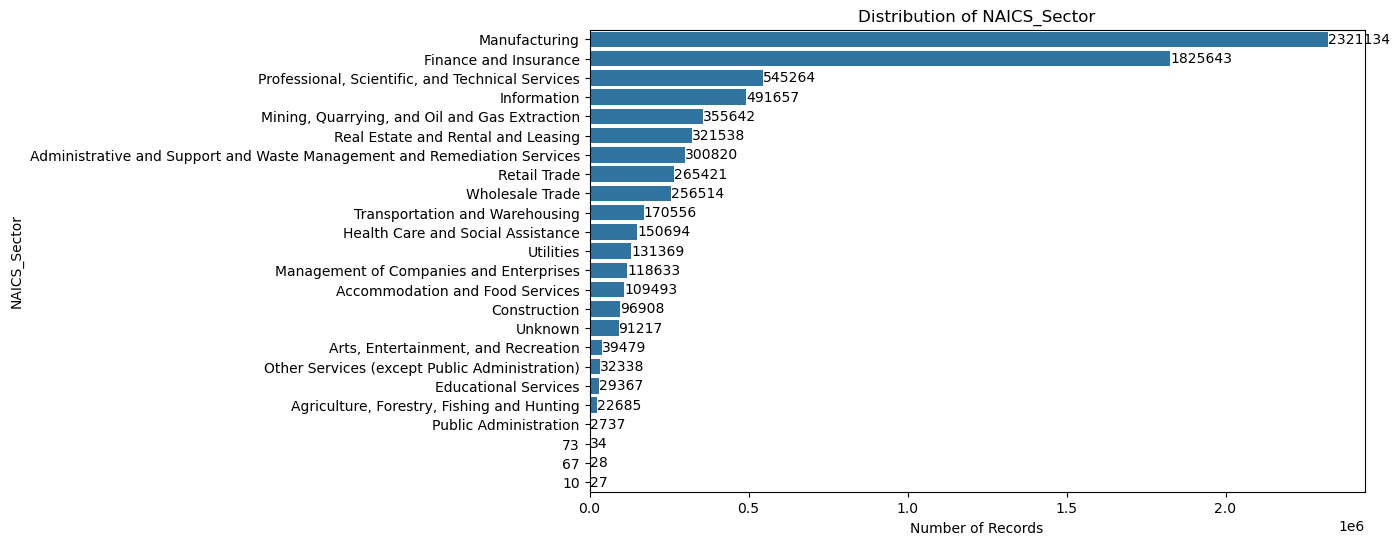

In [31]:
# Calculate the category counts and sort them in descending order
category_counts = crsp_df['NAICS_Sector'].value_counts().sort_values(ascending=False)

# Plot the counts distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=crsp_df, y='NAICS_Sector', order=category_counts.index)
plt.title('Distribution of NAICS_Sector')
plt.xlabel('Number of Records')
plt.ylabel('NAICS_Sector')

# Annotate the bars with the count values
for i, count in enumerate(category_counts):
    plt.text(count, i, f'{count}', ha='left', va='center', color='black')

plt.show()

# Review NUMTRD: Number of Trades
Daily: Number of Trades, Nasdaq contains the number of trades made on the Nasdaq Stock Market each date for a security. Trades on all exchanges are connected to Nasdaqs composite pricing network and all paper trades are included in the count. If the number of trades is unavailable, the field is set to 99.

## G1. Fill NUMTRD na with 99 as "Unknown"

In [32]:
crsp_df["NUMTRD"] = crsp_df["NUMTRD"].fillna("99")

## G2. Cast NUMTRD to integer type

# Review all remaining value related columns.

## H1. Fill na with 0 and cast to appropriate type

In [33]:
int_cols = ["VOL", "SHROUT", "NUMTRD"]
float_cols = ['ASKHI', 'ASK', 'BIDLO', 'BID', 'OPENPRC', 'PRC', 'RET', "CFACPR", "CFACSHR", 'vwretd', 'ewretd', 'sprtrn']
str_cols = ['PERMNO', 'NCUSIP', 'CUSIP', 'TICKER', 'SHRCD', 'SHRCD_Type', 'SHRCD_Detail', 'EXCHCD', 'COMNAM', 'PRIMEXCH', 'TRDSTAT', 'SECSTAT', 'NAICS', 'NAICS_Sector', 'NAICS_Secondary']

In [34]:
crsp_df[int_cols] = crsp_df[int_cols].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(int)
crsp_df[float_cols] = crsp_df[float_cols].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0.00).astype(float)
crsp_df[str_cols] = crsp_df[str_cols].astype(str)

# Take another look at the null analysis

In [35]:
# Count the number of nulls in each column
null_counts = crsp_df.isnull().sum()

# Calculate the percentage of nulls in each column
total_rows = len(crsp_df)
null_percentages = (null_counts / total_rows) * 100

assert null_percentages.min() == 0.0

## I1. Remove duplicates

In [36]:
og_len = len(crsp_df)
crsp_df = crsp_df.drop_duplicates()
new_len = len(crsp_df)
print("num_records_removed: ", og_len - new_len)
print("num_records_kept: ", new_len)

num_records_removed:  1140
num_records_kept:  7678058


# Confirm each PERMNO contains at most num_days records (each PERMNO only has one record per day)

In [37]:
num_days = crsp_df["date"].nunique()

In [38]:
assert crsp_df["PERMNO"].value_counts().max() <= num_days

## J1. Drop all PERMNO with less than 128 days of return

In [39]:
og_permno = crsp_df['PERMNO'].nunique()
permno_counts = crsp_df['PERMNO'].value_counts()
permno_to_keep = permno_counts[permno_counts >= 128].index
crsp_df = crsp_df[crsp_df['PERMNO'].isin(permno_to_keep)]

assert crsp_df["PERMNO"].value_counts().min() >= 128

new_permno = crsp_df['PERMNO'].nunique()
print("num_PERMNO_og: ", new_permno)
print("num_PERMNO_removed: ", og_permno - new_permno)
print("num_PERMNO_kept: ", new_permno)

num_PERMNO_og:  7145
num_PERMNO_removed:  269
num_PERMNO_kept:  7145


## J2. Rename & Reorder all columns

In [40]:
rename_dict = {'date': "Date",
               'PERMNO': "PERMNO_ID",
               'NCUSIP': "NCUSIP_ID",
               'CUSIP': "CUSIP_ID",
               'TICKER': "Ticker",
               'SHRCD': "Share_Code",
               'SHRCD_Type': "Share_Code_Type",
               'SHRCD_Detail': "Share_Code_Detail",
               'EXCHCD': "Exchange_Code",
               'COMNAM': "Company_Name",
               'PRIMEXCH': "Primary_Exchange",
               'TRDSTAT': "Trading_Status",
               'SECSTAT': "Security_Status",
               'NAICS': "NAICS_Industry",
               'NAICS_Sector': "NAICS_Sector",
               'NAICS_Secondary': "NAICS_Secondary",
               'ASKHI': "Ask_or_High_Price",
               'ASK': "Ask_Price",
               'BIDLO': "Bid_or_Low_Price",
               'BID': "Bid_Price",
               'OPENPRC': "Open_Price",
               'PRC': "Close_Price",
               'RET': "Return",
               'VOL': "Volume",
               'SHROUT': "Shares_Outstanding",
               'NUMTRD': "Number_of_Trades",
               'CFACPR': "Cumu_Factor_to_Adjust_Price",
               'CFACSHR': "Cumu_Factor_to_Adjust_Shares",
               'vwretd': "Value_Weighted_Return",
               'ewretd': "Equal_Weighted_Return",
               'sprtrn': "Return_on_SP_Composite_Index"}

crsp_df = crsp_df.rename(columns=rename_dict)
crsp_df = crsp_df[list(rename_dict.values())]

# Take a final look at the columns

In [41]:
crsp_df.columns

Index(['Date', 'PERMNO_ID', 'NCUSIP_ID', 'CUSIP_ID', 'Ticker', 'Share_Code',
       'Share_Code_Type', 'Share_Code_Detail', 'Exchange_Code', 'Company_Name',
       'Primary_Exchange', 'Trading_Status', 'Security_Status',
       'NAICS_Industry', 'NAICS_Sector', 'NAICS_Secondary',
       'Ask_or_High_Price', 'Ask_Price', 'Bid_or_Low_Price', 'Bid_Price',
       'Open_Price', 'Close_Price', 'Return', 'Volume', 'Shares_Outstanding',
       'Number_of_Trades', 'Cumu_Factor_to_Adjust_Price',
       'Cumu_Factor_to_Adjust_Shares', 'Value_Weighted_Return',
       'Equal_Weighted_Return', 'Return_on_SP_Composite_Index'],
      dtype='object')

In [42]:
crsp_df.dtypes

Date                            datetime64[ns]
PERMNO_ID                               object
NCUSIP_ID                               object
CUSIP_ID                                object
Ticker                                  object
Share_Code                              object
Share_Code_Type                         object
Share_Code_Detail                       object
Exchange_Code                           object
Company_Name                            object
Primary_Exchange                        object
Trading_Status                          object
Security_Status                         object
NAICS_Industry                          object
NAICS_Sector                            object
NAICS_Secondary                         object
Ask_or_High_Price                      float64
Ask_Price                              float64
Bid_or_Low_Price                       float64
Bid_Price                              float64
Open_Price                             float64
Close_Price  

In [43]:
crsp_len = len(crsp_df)
crsp_cols = len(crsp_df.columns)
print("number of records:", crsp_len)
print("number of columns:", crsp_cols)

number of records: 7660431
number of columns: 31


# Review unique values and distribution in each remaining column

In [44]:
for column in crsp_df.columns:
  print("-"*10, column, "-"*10)
  print(crsp_df[column].nunique())
  print(crsp_df[column].value_counts())

---------- Date ----------
1509
Date
2022-05-17    5891
2022-05-18    5891
2022-05-19    5890
2022-05-13    5890
2022-05-16    5889
              ... 
2018-01-09    4433
2018-01-05    4433
2018-01-04    4433
2018-01-03    4433
2018-01-02    4433
Name: count, Length: 1509, dtype: int64
---------- PERMNO_ID ----------
7145
PERMNO_ID
93436    1509
10026    1509
10028    1509
10032    1509
10044    1509
         ... 
24012     129
92034     129
23994     128
23970     128
23978     128
Name: count, Length: 7145, dtype: int64
---------- NCUSIP_ID ----------
9047
NCUSIP_ID
45383610    1509
88160R10    1509
46603210    1509
78513510    1509
92552R40    1509
            ... 
75811Y10       1
74102L20       1
92535P87       1
05338F30       1
45784G10       1
Name: count, Length: 9047, dtype: int64
---------- CUSIP_ID ----------
7147
CUSIP_ID
85208J10      1509
88160R10      1509
46603210      1509
29402E10      1509
72913210      1509
              ... 
36870C10       129
50012A10       128
G3

# Save the cleaned df as csv & parquet

In [ ]:
crsp_df.to_csv("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean.csv")
crsp_df.to_parquet("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean.parquet")

In [ ]:
reload = pd.read_parquet("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean.parquet")
assert crsp_df.equals(reload)

reload.head()

,Date,PERMNO_ID,NCUSIP_ID,CUSIP_ID,Ticker,Share_Code,Share_Code_Type,Share_Code_Detail,Exchange_Code,Company_Name,...,Close_Price,Return,Volume,Shares_Outstanding,Number_of_Trades,Cumu_Factor_to_Adjust_Price,Cumu_Factor_to_Adjust_Shares,Value_Weighted_Return,Equal_Weighted_Return,Return_on_SP_Composite_Index
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,149.17999,-0.017454,190618,18668,1036,1.0,1.0,0.008505,0.011232,0.008303
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,147.69000,-0.009988,63693,18668,1283,1.0,1.0,0.005856,0.005103,0.006399
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,149.73000,0.013813,127552,18668,1138,1.0,1.0,0.004001,0.005272,0.004029
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,148.30000,-0.009550,44647,18668,745,1.0,1.0,0.005804,0.003880,0.007034
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,148.41000,0.000742,55014,18668,990,1.0,1.0,0.001816,0.000584,0.001662


# Upload the parquet to s3

In [ ]:
s3.upload_file("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean.parquet", bucket, "CRSP/crsp_2018-2023_clean.parquet")

In [ ]:
reload_path = s3_download("CRSP/crsp_2018-2023_clean.parquet")

In [ ]:
reload = pd.read_parquet("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean.parquet")
assert crsp_df.equals(reload)

reload.head()

,Date,PERMNO_ID,NCUSIP_ID,CUSIP_ID,Ticker,Share_Code,Share_Code_Type,Share_Code_Detail,Exchange_Code,Company_Name,...,Close_Price,Return,Volume,Shares_Outstanding,Number_of_Trades,Cumu_Factor_to_Adjust_Price,Cumu_Factor_to_Adjust_Shares,Value_Weighted_Return,Equal_Weighted_Return,Return_on_SP_Composite_Index
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,149.17999,-0.017454,190618,18668,1036,1.0,1.0,0.008505,0.011232,0.008303
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,147.69000,-0.009988,63693,18668,1283,1.0,1.0,0.005856,0.005103,0.006399
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,149.73000,0.013813,127552,18668,1138,1.0,1.0,0.004001,0.005272,0.004029
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,148.30000,-0.009550,44647,18668,745,1.0,1.0,0.005804,0.003880,0.007034
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,148.41000,0.000742,55014,18668,990,1.0,1.0,0.001816,0.000584,0.001662
